<a href="https://colab.research.google.com/github/KevinPatel04/TensorFlow-Course/blob/master/Tensorflow_for_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1.** Import Libraries


In [1]:
# import required libraries
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Step 2.** Import MNIST Data set

[Fashion MNIST Dataset](https://keras.io/api/datasets/fashion_mnist/)

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Step 3.** Plot the Data from Dataset

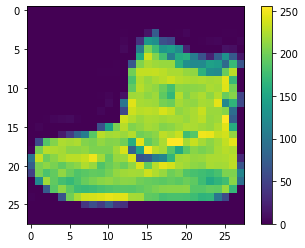

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Step 4.** Pre-processing of Data

In [0]:
# normalize the images from dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

**Step 5.** Model Generation

In [0]:
model = keras.Sequential([ 
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
                          ])

**Step 6.** Verify the Model Structure


In [0]:
model.compile( 
              optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy']
              )

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Step 7.** Train the Model

In [9]:
model.fit(
          train_images,
          train_labels,
          epochs=5
          )

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4988 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3398 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8916


**Step 8.** Evaluate the Model

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy: ",test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3428 - accuracy: 0.8770
Accuracy:  0.8769999742507935


In [11]:
predictions = model.predict(test_images)
predictions[0]

array([1.2362760e-06, 4.3467492e-09, 6.2684171e-07, 1.0286460e-05,
       1.9202888e-07, 1.9290417e-02, 1.2337256e-05, 9.7999342e-02,
       5.9154310e-05, 8.8262647e-01], dtype=float32)

In [12]:
# predicted label
numpy.argmax(predictions[0])

9

In [13]:
# actual label
test_labels[0]

9

In [14]:
numpy.argmax(predictions, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [15]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

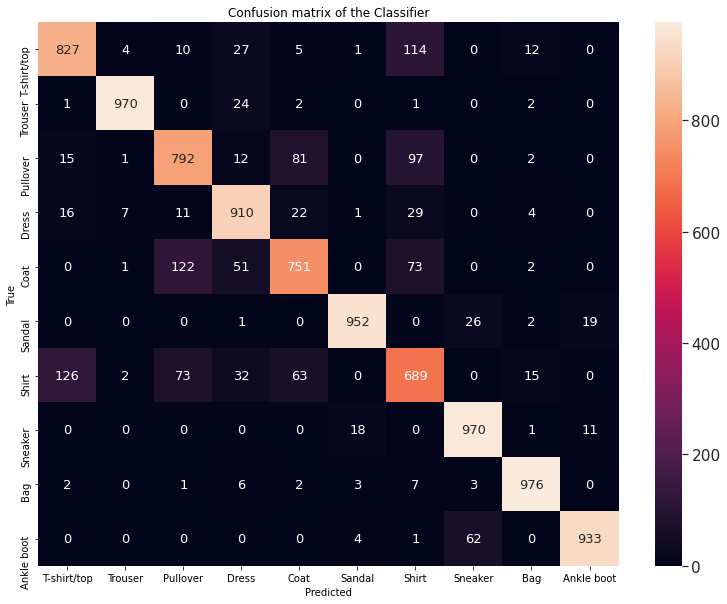

In [16]:
labels = ["T-shirt/top", "Trouser",	"Pullover",	"Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
cm = confusion_matrix(test_labels, numpy.argmax(predictions, axis=1))
fig = plt.figure(figsize=(13, 10))
df_cm = pd.DataFrame(cm, labels, labels)
plt.title('Confusion matrix of the Classifier')
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 13}) # font size
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()